In [1]:
# Kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Veri setinin yüklenmesi
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [3]:
# Verinin eğitim ve test setlerine ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Modelin eğitilmesi ve tahmin yapılması
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)
    
    return cm, cr

In [6]:
# Confusion matrix'in görselleştirilmesi ve başlık eklenmesi
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [7]:
# Ortalama doğruluk ve standart sapma değerlerinin döndürülmesi
def cross_val_evaluation(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores.mean(), scores.std()

Logistic Regression
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     10.0
1                   1.0     1.0       1.0      9.0
2                   1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     30.0
weighted avg        1.0     1.0       1.0     30.0


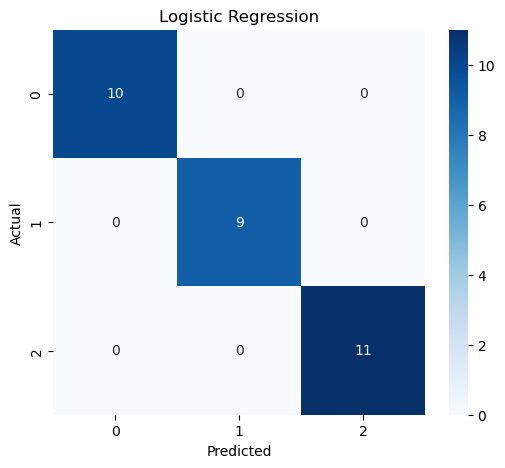

In [8]:
# Logistic Regression
print("Logistic Regression")
log_reg = LogisticRegression()
cm, cr = evaluate_model(log_reg, X_train_scaled, y_train, X_test_scaled, y_test)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(pd.DataFrame(cr).transpose())
plot_confusion_matrix(cm, "Logistic Regression")

In [9]:
# Logistic Regression için ortalama doğruluk ve standart sapma değerlerinin yazdırılması
log_reg_mean, log_reg_std = cross_val_evaluation(log_reg, X_train_scaled, y_train)
print(f'Logistic Regression CV Accuracy: {log_reg_mean:.4f} ± {log_reg_std:.4f}')

Logistic Regression CV Accuracy: 0.9583 ± 0.0456


Support Vector Machine
Confusion Matrix
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     10.0
1                   1.0     1.0       1.0      9.0
2                   1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     30.0
weighted avg        1.0     1.0       1.0     30.0


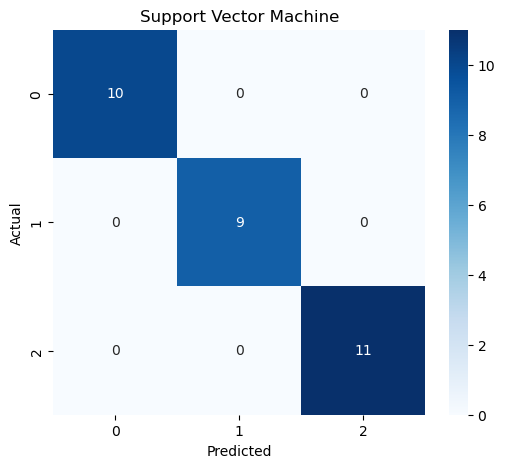

In [10]:
# Support Vector Machine
print('Support Vector Machine')
svc = SVC()
cm, cr = evaluate_model(svc, X_train_scaled, y_train, X_test_scaled, y_test)
print('Confusion Matrix')
print(cm)
print('Classification Report')
print(pd.DataFrame(cr).transpose())
plot_confusion_matrix(cm, 'Support Vector Machine')

In [11]:
# Support Vector Machine için ortalama doğruluk ve standart sapma değerlerinin yazdırılması
svc_mean, svc_std = cross_val_evaluation(svc, X_train_scaled, y_train)
print(f"SVM CV Accuracy: {svc_mean:.4f} ± {svc_std:.4f}")

SVM CV Accuracy: 0.9500 ± 0.0612


Random Forest
Confusion Matrix
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     10.0
1                   1.0     1.0       1.0      9.0
2                   1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     30.0
weighted avg        1.0     1.0       1.0     30.0


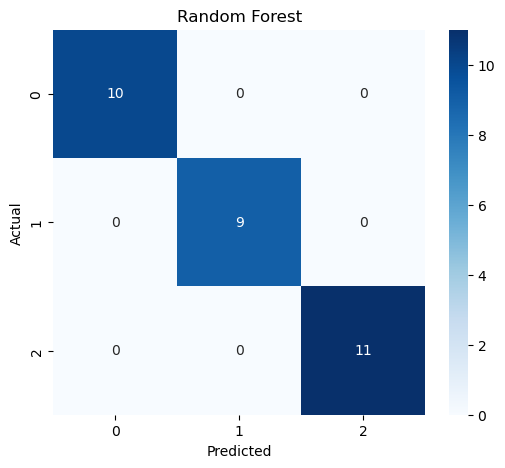

In [12]:
# Random Forest
print('Random Forest')
rf = RandomForestClassifier()
cm, cr = evaluate_model(rf, X_train_scaled, y_train, X_test_scaled, y_test)
print('Confusion Matrix')
print(cm)
print('Classification Report')
print(pd.DataFrame(cr).transpose())
plot_confusion_matrix(cm, 'Random Forest')

In [13]:
# Random Forest için ortalama doğruluk ve standart sapma değerlerinin yazdırılması
rf_mean, rf_std = cross_val_evaluation(rf, X_train_scaled, y_train)
print(f"Random Forest CV Accuracy: {rf_mean:.4f} ± {rf_std:.4f}")

Random Forest CV Accuracy: 0.9583 ± 0.0456


K-Nearest Neighbors
Confusion Matrix
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     10.0
1                   1.0     1.0       1.0      9.0
2                   1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     30.0
weighted avg        1.0     1.0       1.0     30.0


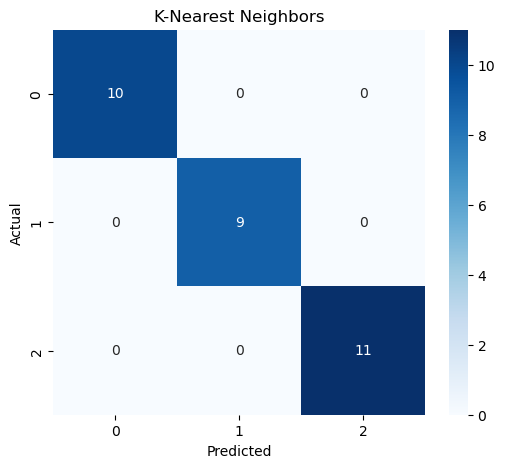

In [14]:
# K-Nearest Neighbors
print('K-Nearest Neighbors')
knn = KNeighborsClassifier()
cm, cr = evaluate_model(knn, X_train_scaled, y_train, X_test_scaled, y_test)
print('Confusion Matrix')
print(cm)
print('Classification Report')
print(pd.DataFrame(cr).transpose())
plot_confusion_matrix(cm, 'K-Nearest Neighbors')

In [15]:
# K-Nearest Neighbors için ortalama doğruluk ve standart sapma değerlerinin yazdırılması
knn_mean, knn_std = cross_val_evaluation(knn, X_train_scaled, y_train)
print(f"KNN CV Accuracy: {knn_mean:.4f} ± {knn_std:.4f}")

KNN CV Accuracy: 0.9250 ± 0.0612
